# Heart Disease Prediction

## Introduction

### Problem Statement

**Objective:** Predict the risk of heart disease using patient health indicators.

**Dataset:** Cardiovascular Disease Dataset (Mendeley Data)

This heart disease dataset is acquired from one o f the multispecialty hospitals in India. Over 14 common features which makes it one of the heart disease dataset available so far for research purposes. This dataset consists of 1000 subjects with 12 features. This dataset will be useful for building a early-stage heart disease detection as well as to generate predictive machine learning models.

https://data.mendeley.com/datasets/dzz48mvjht/1

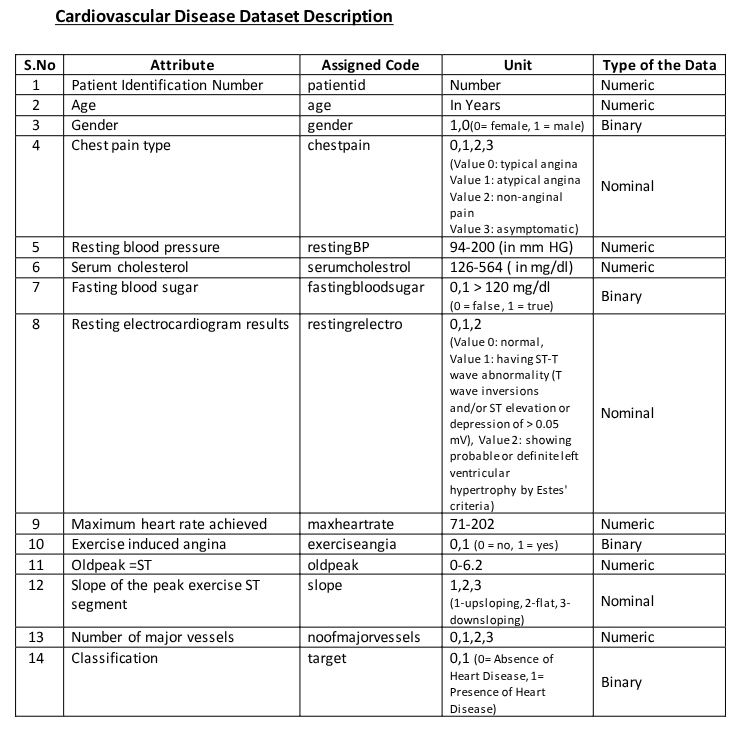

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load the Dataset

In [2]:
import pandas as pd

file_id = "1E7JKe_OvLL0vPFfeY07X5657gft0zei_"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)
df.head()


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


## Data understanding with basic checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


max age: 80
min age: 20


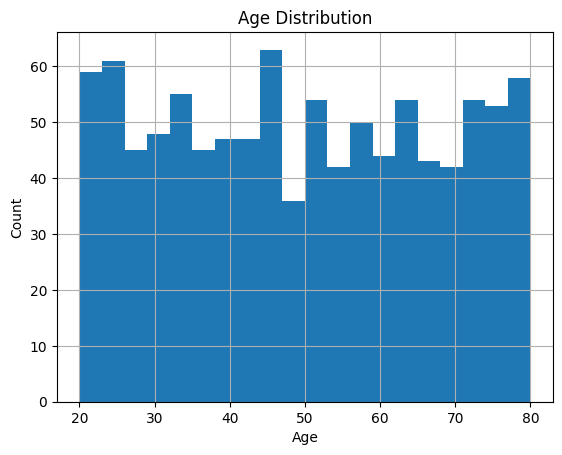

In [6]:
print(f"max age: {df['age'].max()}")
print(f"min age: {df['age'].min()}")

df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

0 : female 
1 : male 

gender
1    765
0    235
Name: count, dtype: int64


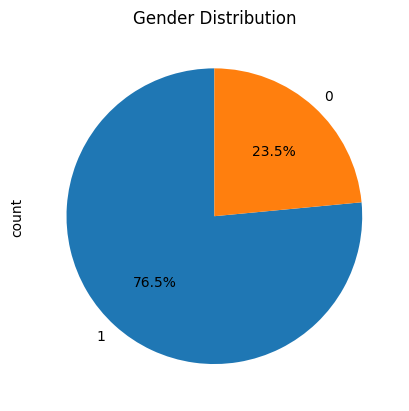

In [7]:
print("0 : female \n1 : male \n")
print(df['gender'].value_counts())

df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

Chest Pain Types:
0: typical angina
1: atypical angina
2: non-anginal pain
3: asymptomatic

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


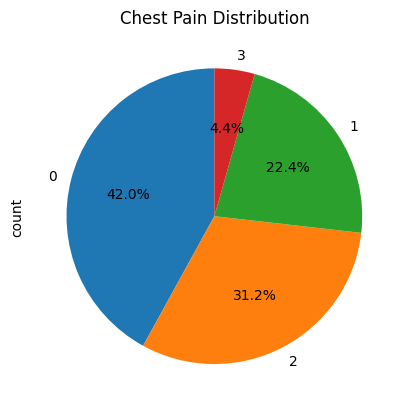

In [8]:
print("Chest Pain Types:\n0: typical angina\n1: atypical angina\n2: non-anginal pain\n3: asymptomatic\n")

print(df['chestpain'].value_counts())

df['chestpain'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
plt.title('Chest Pain Distribution')
plt.show()

max restingBP: 200
min restingBP: 94
mean restingBP: 151.747


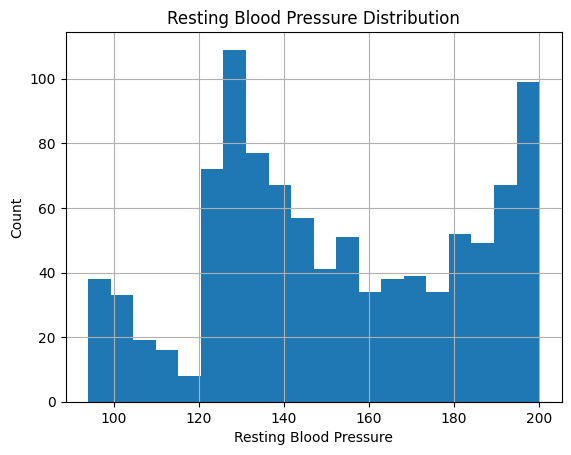

In [13]:
print(f"max restingBP: {df['restingBP'].max()}")
print(f"min restingBP: {df['restingBP'].min()}")
print(f"mean restingBP: {df['restingBP'].mean()}")

df['restingBP'].hist(bins=20)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.title('Resting Blood Pressure Distribution')
plt.show()

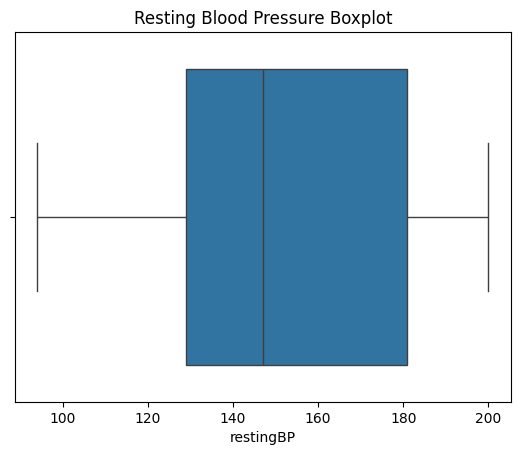

In [18]:
sns.boxplot(x=df['restingBP'])
plt.title('Resting Blood Pressure Boxplot')
plt.show()

max serumcholestrol: 602
min serumcholestrol: 0
mean serumcholestrol: 311.447


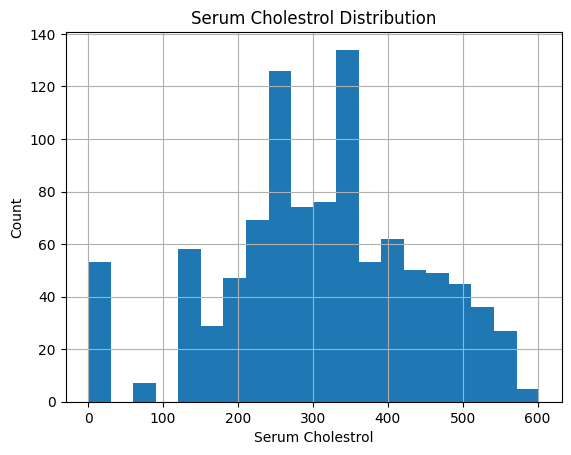

In [21]:
print(f"max serumcholestrol: {df['serumcholestrol'].max()}")
print(f"min serumcholestrol: {df['serumcholestrol'].min()}")
print(f"mean serumcholestrol: {df['serumcholestrol'].mean()}")

df['serumcholestrol'].hist(bins=20)
plt.xlabel('Serum Cholestrol')
plt.ylabel('Count')
plt.title('Serum Cholestrol Distribution')
plt.show()

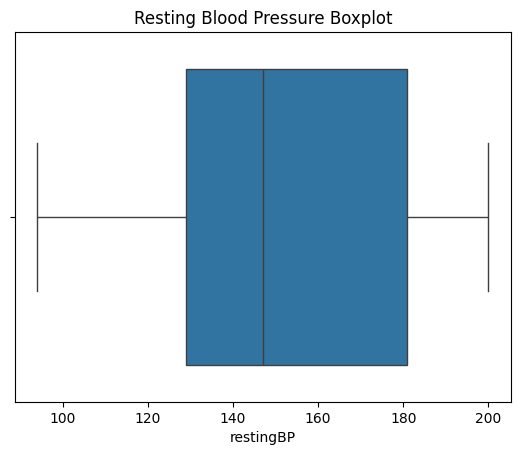

In [22]:
sns.boxplot(x=df['restingBP'])
plt.title('Resting Blood Pressure Boxplot')
plt.show()